In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as ft

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data/filter_data.csv')
hurst_estimates = pd.read_csv('data/hurst_estimates.csv')

In [3]:
data = data['window_1_0']
# data = data.iloc[:10000]
data = (data - data.min())
data = data / data.max()

# Forecasting

## 1 minute horizon

In [185]:
back_horizon = 60
pred_horizon = 1

X = np.zeros((len(data) - back_horizon - pred_horizon - 1, back_horizon, 1))
y = np.zeros((len(data) - back_horizon - pred_horizon - 1, pred_horizon, 1))
# y = np.zeros(len(data) - 2 * horizon - 1)

for i in range(0, len(data) - back_horizon - pred_horizon - 1):
    X[i] = data[i:i + back_horizon].values.reshape(back_horizon, 1)
    
    y[i] = data[i+back_horizon:i + back_horizon + pred_horizon].values.reshape(pred_horizon, 1)
    
y = y.reshape(y.shape[0], y.shape[1])

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [235]:
X_train = X_train.reshape(len(X_train), 60)
X_test = X_test.reshape(len(X_test), 60)

y_train = y_train.reshape(len(y_train))
y_test = y_test.reshape(len(y_test))

In [236]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((68956, 60), (17240, 60), (68956,), (17240,))

In [240]:
# create model
model = Sequential()
model.add(Dense(200, input_dim=60))
# model.add(Dense(40, activation='relu'))
model.add(Dense(1))

# model = Sequential()

# model.add(LSTM(units=1, batch_input_shape=(None, 60, 1), return_sequences=False))
# model.add(Dense(60, batch_input_shape=(None, 60, 1)))
# model.add(Dropout(0.4))
# model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [241]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 200)               12200     
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 201       
Total params: 12,401
Trainable params: 12,401
Non-trainable params: 0
_________________________________________________________________


In [242]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 68956 samples, validate on 17240 samples
Epoch 1/10
68956/68956 [==============================] - 7s 102us/step - loss: 0.0495 - acc: 2.9004e-05 - val_loss: 0.0191 - val_acc: 0.0000e+00
Epoch 2/10
68956/68956 [==============================] - 5s 74us/step - loss: 0.0332 - acc: 2.9004e-05 - val_loss: 0.0246 - val_acc: 0.0000e+00
Epoch 3/10
68956/68956 [==============================] - 5s 75us/step - loss: 0.0255 - acc: 2.9004e-05 - val_loss: 0.0212 - val_acc: 0.0000e+00
Epoch 4/10
68956/68956 [==============================] - 5s 75us/step - loss: 0.0223 - acc: 2.9004e-05 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 5/10
68956/68956 [==============================] - 6s 89us/step - loss: 0.0196 - acc: 2.9004e-05 - val_loss: 0.0193 - val_acc: 0.0000e+00
Epoch 6/10
68956/68956 [==============================] - 6s 86us/step - loss: 0.0175 - acc: 2.9004e-05 - val_loss: 0.0166 - val_acc: 0.0000e+00
Epoch 7/10
68956/68956 [==============================] - 6s 82us/step - loss: 

<IPython.core.display.Javascript object>


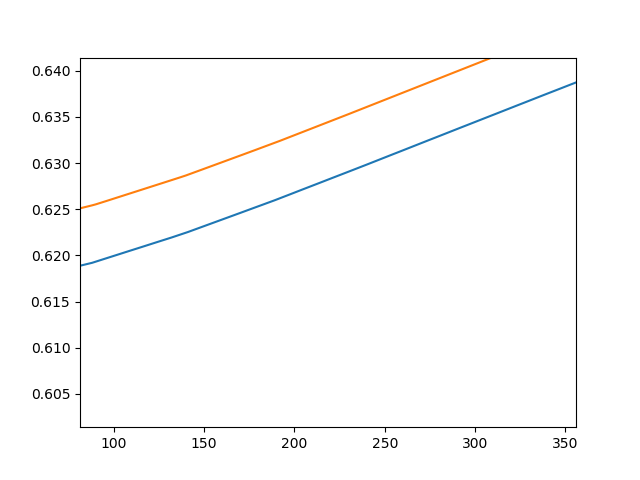

In [244]:
%matplotlib notebook
plt.plot(y_test)
plt.plot(model.predict(X_test))

## Tutorial

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot

In [57]:
horizon = 60

X = np.zeros((len(data) - 2 * horizon - 1, horizon, 1))
# y = np.zeros((len(data) - 2 * horizon - 1, horizon, 1))
y = np.zeros(len(data) - 2 * horizon - 1)

for i in range(0, len(data) - 2 * horizon - 1):
    X[i] = data[i:i+horizon].values.reshape(60, 1)
    
#     y[i] = data[i+horizon:i+2*horizon].values.reshape(60, 1)
    y[i] = data[i+2*horizon - 1]

In [58]:
y[0], X[60][59]

(0.036145689257722456, array([0.03614569]))

In [59]:
X.shape, y.shape

((9879, 60, 1), (9879,))

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [129]:
model = Sequential()

# model.add(LSTM(1, batch_input_shape=(None, 60, 1), return_sequences=False))

model.add(LSTM(units=60, batch_input_shape=(None, 60, 1), return_sequences=True))
model.add(LSTM(1, return_sequences=False))
# model.add(Dense(10))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

# model = MultiOutputRegressor(model)

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 60, 60)            14880     
_________________________________________________________________
lstm_26 (LSTM)               (None, 1)                 248       
Total params: 15,128
Trainable params: 15,128
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 7903 samples, validate on 1976 samples
Epoch 1/5
5248/7903 [==================>...........] - ETA: 9s - loss: 0.1593 - acc: 0.0000e+00

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


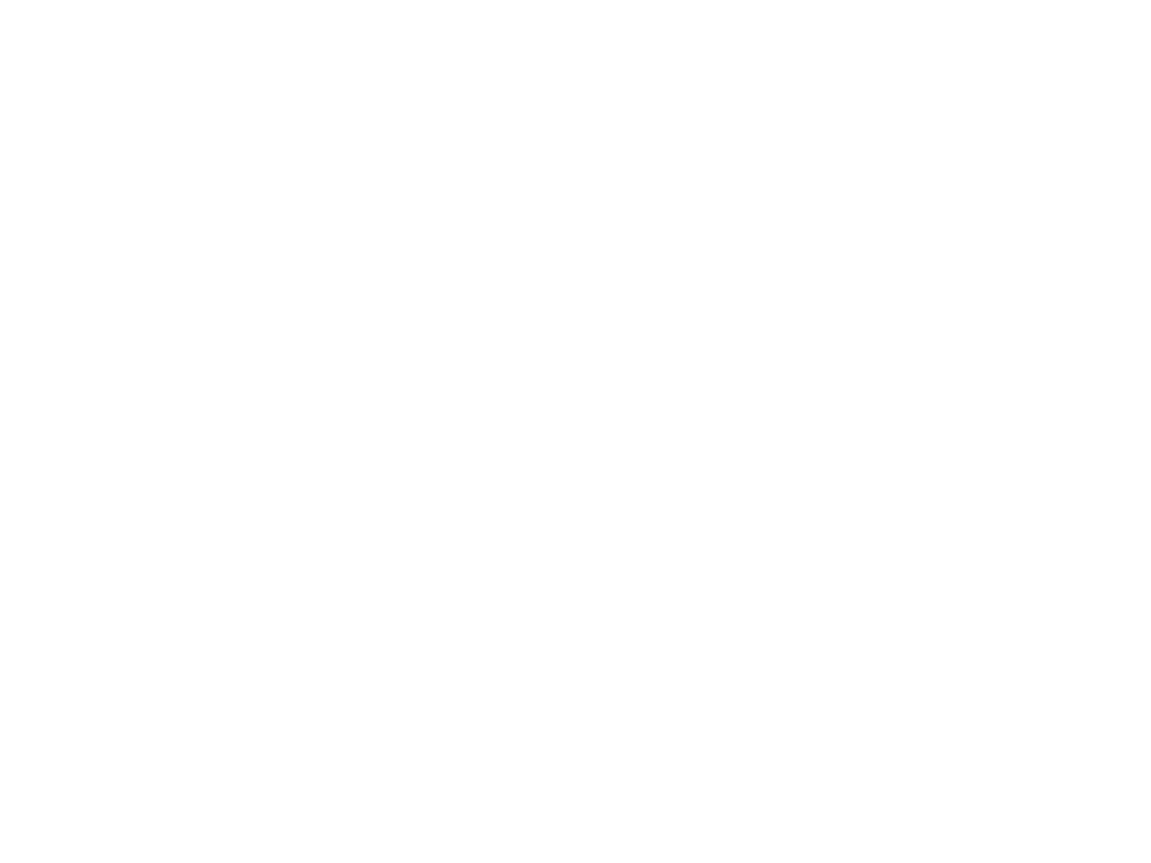

In [15]:
%matplotlib notebook
plt.plot(history.history['loss'])

In [16]:
pred = model.predict(X_test)

In [17]:
pred.shape, y_test.shape

((1976, 1), (1976,))

<IPython.core.display.Javascript object>


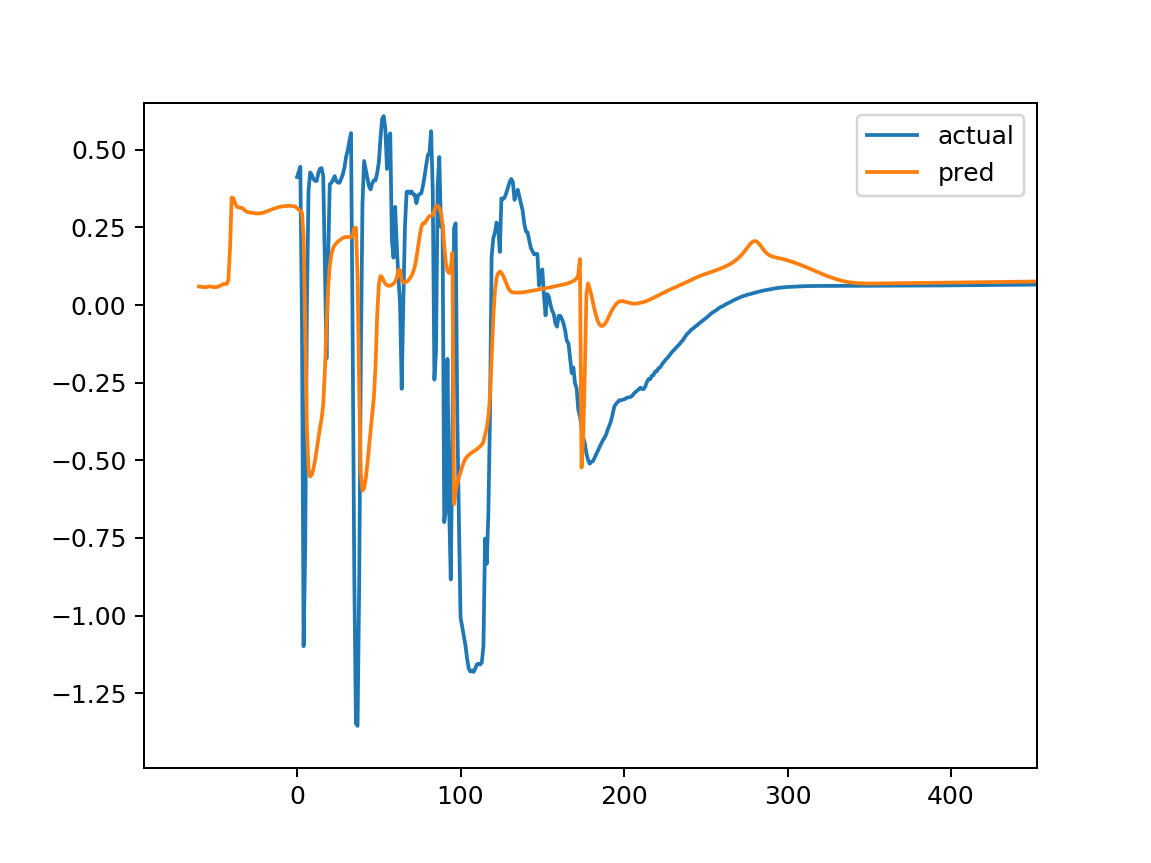

In [21]:
%matplotlib notebook
ind = np.arange(0, len(y_test))
plt.plot(ind, y_test, label='actual')
plt.plot(ind - 60, pred, label='pred')
plt.legend()

<IPython.core.display.Javascript object>


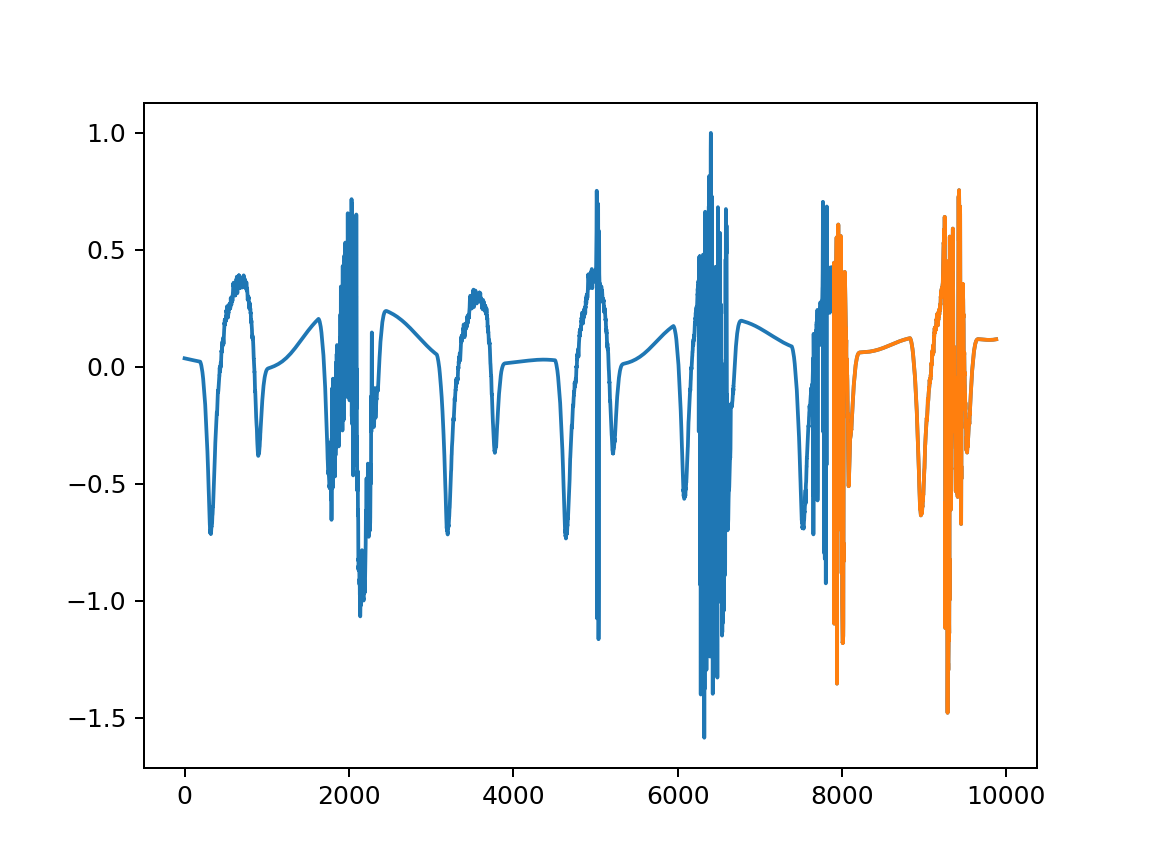

In [19]:
%matplotlib notebook
plt.plot(y)
plt.plot(np.arange(len(y) - len(y_test), len(y)), y_test)

## Multioutput LSTM Model

In [175]:
back_horizon = 60
pred_horizon = 10

X = np.zeros((len(data) - back_horizon - pred_horizon - 1, back_horizon, 1))
y = np.zeros((len(data) - back_horizon - pred_horizon - 1, pred_horizon, 1))
# y = np.zeros(len(data) - 2 * horizon - 1)

for i in range(0, len(data) - back_horizon - pred_horizon - 1):
    X[i] = data[i:i + back_horizon].values.reshape(back_horizon, 1)
    
    y[i] = data[i+back_horizon:i + back_horizon + pred_horizon].values.reshape(pred_horizon, 1)
    
y = y.reshape(y.shape[0], y.shape[1])

In [176]:
X.shape, y.shape

((86187, 60, 1), (86187, 10))

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [178]:
model = Sequential()

model.add(LSTM(units=20, batch_input_shape=(None, 60, 1), return_sequences=False))
# model.add(Dropout(0.2))
# model.add(LSTM(60, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(10))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 20)                1760      
_________________________________________________________________
dropout_16 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                210       
Total params: 1,970
Trainable params: 1,970
Non-trainable params: 0
_________________________________________________________________


In [180]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 68949 samples, validate on 17238 samples
Epoch 1/10
68949/68949 [==============================] - 129s 2ms/step - loss: 0.0633 - acc: 0.1129 - val_loss: 0.0273 - val_acc: 0.3930
Epoch 2/10
68949/68949 [==============================] - 137s 2ms/step - loss: 0.0309 - acc: 0.1277 - val_loss: 0.0254 - val_acc: 0.2508
Epoch 3/10
68949/68949 [==============================] - 119s 2ms/step - loss: 0.0300 - acc: 0.1720 - val_loss: 0.0232 - val_acc: 0.4284
Epoch 4/10
68949/68949 [==============================] - 95s 1ms/step - loss: 0.0297 - acc: 0.2136 - val_loss: 0.0248 - val_acc: 0.4144
Epoch 5/10
68949/68949 [==============================] - 94s 1ms/step - loss: 0.0294 - acc: 0.2417 - val_loss: 0.0226 - val_acc: 0.2251
Epoch 6/10
68949/68949 [==============================] - 94s 1ms/step - loss: 0.0293 - acc: 0.2316 - val_loss: 0.0232 - val_acc: 0.1563
Epoch 7/10
68949/68949 [==============================] - 94s 1ms/step - loss: 0.0293 - acc: 0.2515 - val_loss: 0.0224 - val_

In [ ]:
# LSTM 60 - Dropout 0.2 - LSTM 60 - dropout 0.5 - Dense 10: acc: 0.35 val_acc = 0.31 (best = 0.48)
# LSTM 60 - Dropout 0.5 - Dense 10: acc: 0.268, val_acc = 0.25 (best = 0.44)

<IPython.core.display.Javascript object>


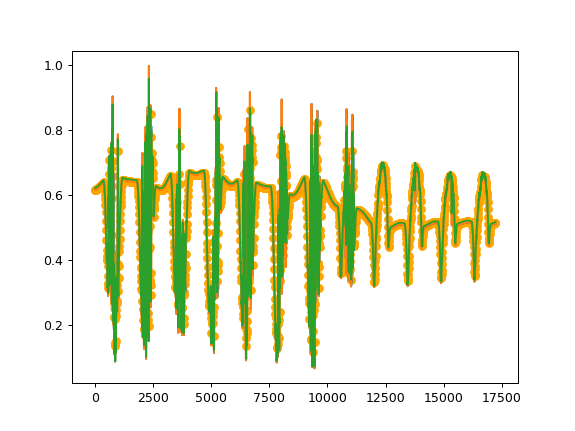

In [181]:
to_pred_at = np.arange(0, len(X_test), pred_horizon)
X_partial_test = X_test[to_pred_at]

pred = model.predict(X_partial_test)
pred = pred.flatten()

pred.shape

%matplotlib notebook
plt.plot(np.arange(0, len(y_test)), y_test[:, 0])
plt.plot(pred, color='orange')

plt.scatter(to_pred_at, pred[to_pred_at], c='orange')

## Create an LSTM Model

In [17]:
class KerasBatchGenerator(object):
    def __init__(self, data, num_steps, batch_size, skip_step=5):
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.skip_step = skip_step
        self.current_idx = 0
        
    def generate(self):
        x = np.zeros((self.batch_size, self.num_steps))
        y = np.zeros((self.batch_size, self.num_steps, self.vocabulary))
        
        while True:
            for i in range(self.batch_size):
                if self.current_idx + self.num_steps >= len(self.data):
                    # reset the index back to the start of the data set
                    self.current_idx = 0
                    
                x[i, :] = self.data[self.current_idx:self.current_idx + self.num_steps]
                y = self.data[self.current_idx + 1:self.current_idx + self.num_steps + 1]
                
#                 temp_y = self.data[self.current_idx + 1:self.current_idx + self.num_steps + 1]
                # convert all of temp_y into a one hot representation
#                 y[i, :, :] = to_categorical(temp_y, num_classes=self.vocabulary)

                self.current_idx += self.skip_step
            yield x, y

## Single point prediction

In [20]:
num_steps = 2000
batch_size = 20

train_split, val_split = int(0.7 * len(data)), int(0.85 * len(data))
train_data, valid_data, test_data = data[:train_split], data[train_split:val_split], data[val_split:]

In [21]:
train_data_generator = KerasBatchGenerator(train_data, num_steps, batch_size, skip_step=num_steps)

valid_data_generator = KerasBatchGenerator(valid_data, num_steps, batch_size, skip_step=num_steps)

In [46]:
hidden_size = 50

model = Sequential()

model.add(LSTM(hidden_size, batch_input_shape=(batch_size, 1, 1), stateful=True))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TypeError: while_loop() got an unexpected keyword argument 'maximum_iterations'

In [40]:
checkpointer = ModelCheckpoint(filepath='data' + '/model-{epoch:02d}.hdf5', verbose=1)

In [43]:
model.compile(optimizer='adam')

In [44]:
num_epochs = 5

model.fit_generator(train_data_generator.generate(), len(train_data)//(batch_size*num_steps), num_epochs,
                        validation_data=valid_data_generator.generate(),
                        validation_steps=len(valid_data)//(batch_size*num_steps), callbacks=[checkpointer])

RuntimeError: You must compile your model before using it.

In [38]:
model = Sequential()
# model.add(Embedding(inputSize, batch_input_shape=(batchSize, 1), output_dim=256))
# model.add(LSTM(128, batch_input_shape=(20,), stateful=True))
model.add(LSTM(32, batch_input_shape=(batchSize, 1, 1), stateful=True))

# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'], )

ValueError: Input 0 is incompatible with layer lstm_5: expected ndim=3, found ndim=2

In [40]:
model = Sequential()
model.add(LSTM(10, batch_input_shape=(20, 1, 1), return_sequences=False, stateful=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Pre-Process the dataset

In [7]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [8]:
# Correct the data
from sklearn.preprocessing import MinMaxScaler
correctedData = data.copy()
stdCorrect     = np.std(correctedData)
correctedData /= stdCorrect

# X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(correctedData)
correctedData = scaler.transform(correctedData)
# minCorrect     = np.min(correctedData)
# correctedData -= minCorrect

correctedData = pd.DataFrame(correctedData, columns=['Value'])

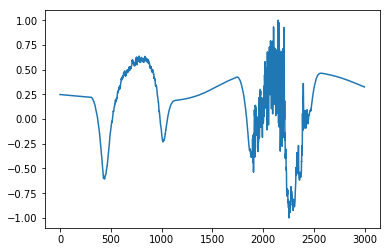

In [10]:
plt.plot(correctedData)

In [13]:
# Split the data
X_train, Y_train, X_test, Y_test = split_data(correctedData, correctedData, 1)[0]

[1500]


In [175]:
# Normalise to 1 stddiv
bothStd  = np
X_train /= np.std(X_train.values)
X_test  /= np.std(X_train.values)

# Make positive
bothMin  = np.min([np.min(X_train.values), np.min(X_test.values)])
X_train -= bothMin
X_test  -= bothMin

In [14]:
X_train = timeseries_to_supervised(X_train)[1:]
X_test  = timeseries_to_supervised(X_test)[1:]

In [15]:
X_train.head()

,Value,Value
1,0.248267,0.248169
2,0.248169,0.248072
3,0.248072,0.247974
4,0.247974,0.247877
5,0.247877,0.247779


In [16]:
# Train the model
model.fit(X_train.values[:, 0], X_train.values[:, 1], epochs=10, batch_size=20)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (1499, 1)

In [41]:
def fit_lstm(model, train, test, batch_size, nb_epoch):
#     X, y = train[:, 0:-1], train[:, -1]
#     X = X.reshape(X.shape[0], 1, X.shape[1])
    
    for i in range(nb_epoch):
        X = train[i * batch_size : (i + 1) * batch_size].reshape(20, 1, 1)
        Y = test[i * batch_size : (i + 1) * batch_size].reshape(20, 1, 1)
        
        print(len(X))
        print(len(Y))
#         model.fit(X, test[:batch_size], epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.fit(X, Y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

In [42]:
fit_lstm(model, X_train.values[:, 0], X_train.values[:, 1], 20, 10)

20
20


ValueError: Error when checking target: expected dense_6 to have 2 dimensions, but got array with shape (20, 1, 1)

In [23]:
X_test.values[:, 0][:20].reshape(20, 1, 1)

array([[[0.30472613]],

       [[0.30526413]],

       [[0.30580214]],

       [[0.30634015]],

       [[0.30687816]],

       [[0.30741749]],

       [[0.3079555 ]],

       [[0.30849351]],

       [[0.30903152]],

       [[0.30956953]],

       [[0.31010754]],

       [[0.31064554]],

       [[0.31118488]],

       [[0.31172289]],

       [[0.31226089]],

       [[0.3127989 ]],

       [[0.31333691]],

       [[0.31387492]],

       [[0.31441293]],

       [[0.31495226]]])

In [20]:
prep = model.predict(X_test.values[:, 0][:20].reshape(20, 1, 1))

In [22]:
prep

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

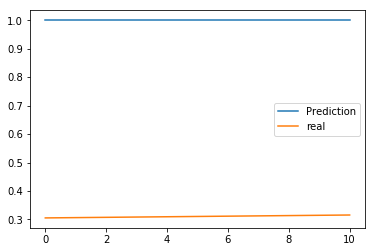

In [21]:
plt.plot(np.linspace(0, 10, len(prep)), prep )
plt.plot(np.linspace(0, 10, len(prep)), X_test.values[:, 1][:20])

plt.legend(['Prediction', 'real'])